In [ ]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
df = pd.read_csv(f"{path}/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
rom sklearn.ensemble import RandomForestClassifier

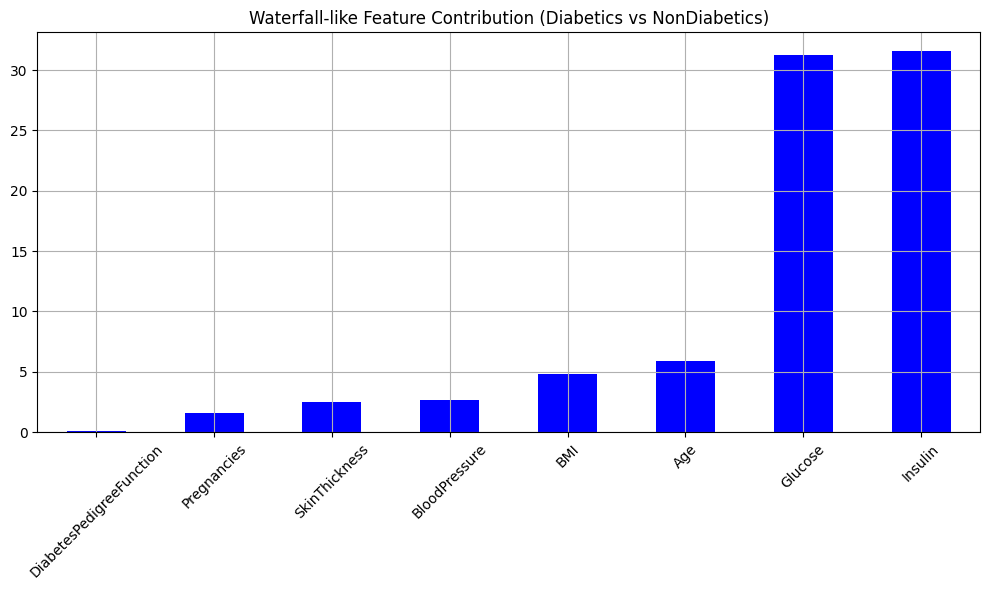

In [ ]:
#waterfall plot
mean_values = df[df['Outcome'] == 1].mean() - df[df['Outcome'] == 0].mean()
mean_values = mean_values.drop('Outcome').sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
mean_values.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Waterfall-like Feature Contribution (Diabetics vs NonDiabetics)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Logistic Regression
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



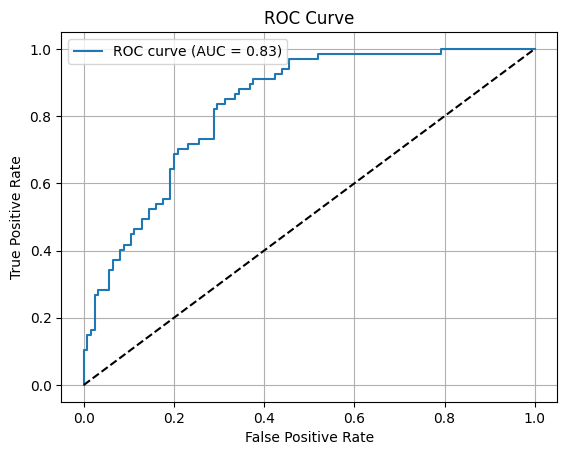

In [ ]:
#ROC Curve
y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

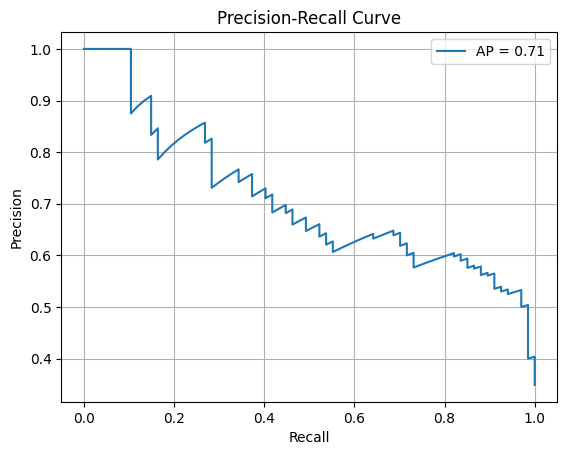

In [ ]:
# Precision Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


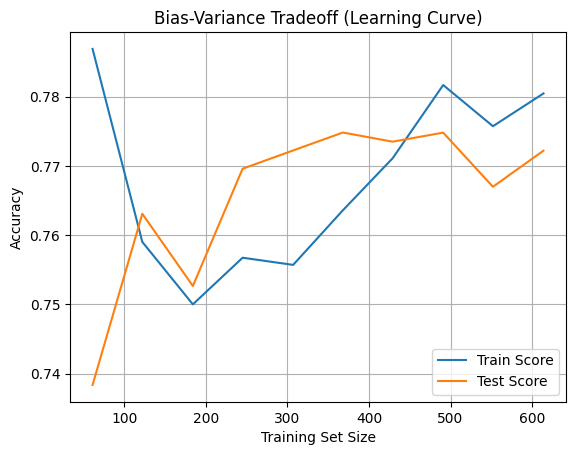

In [ ]:
#Bia Variance Trade off
train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Train Score')
plt.plot(train_sizes, test_mean, label='Test Score')
plt.title("Bias-Variance Tradeoff (Learning Curve)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

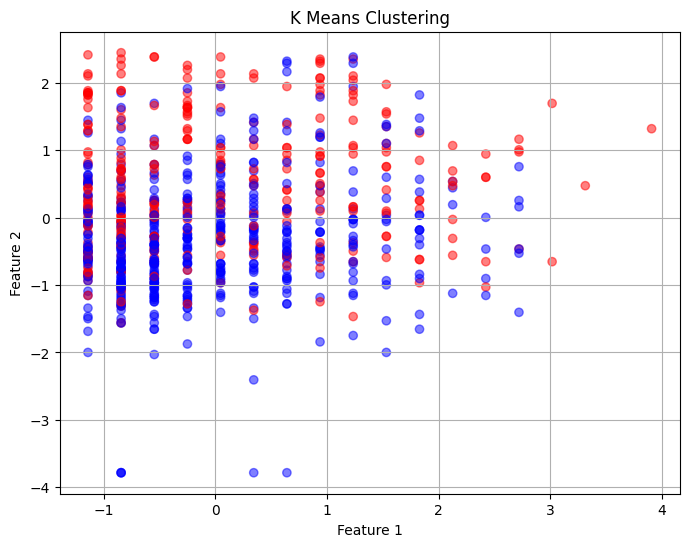

In [ ]:
#K Means Clustering
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
colors = ['red', 'blue']
cluster_colors = [colors[label] for label in df['Cluster']]
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_colors, alpha=0.5)
plt.title('K Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

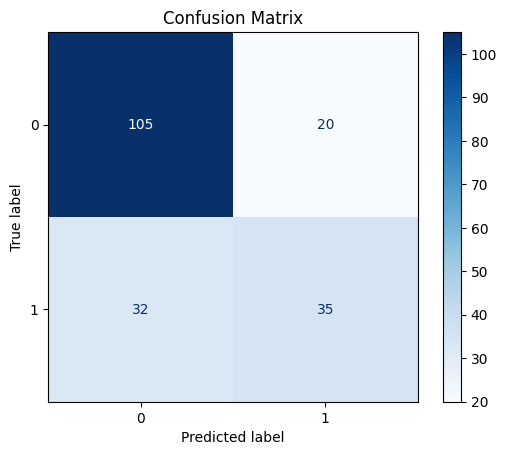

In [ ]:
#Confusion Matirix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


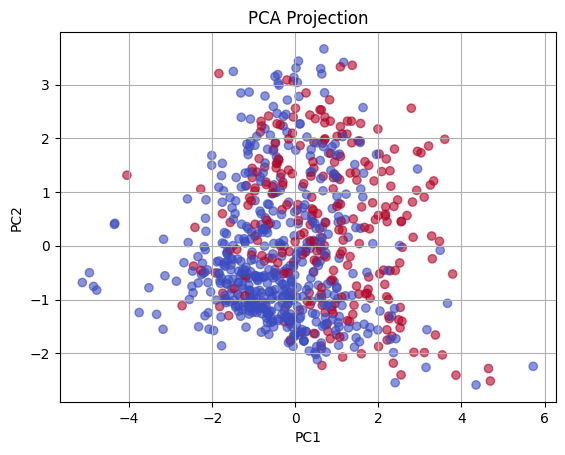

In [ ]:
#Dimentsionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

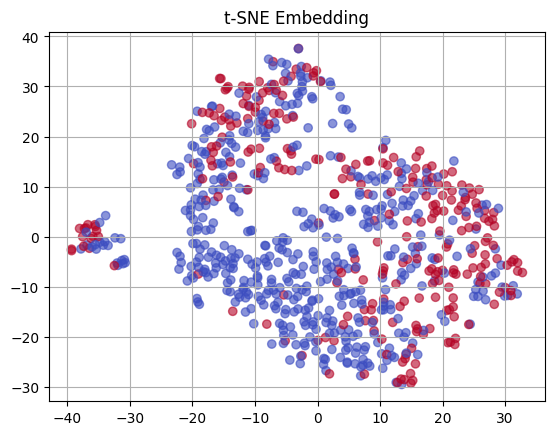

In [ ]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Embedding")
plt.grid(True)
plt.show()


In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

feat_importances.plot(kind='barh', title='Random Forest Feature Importances')
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
